AxesSubplot(0.125,0.125;0.775x0.755)


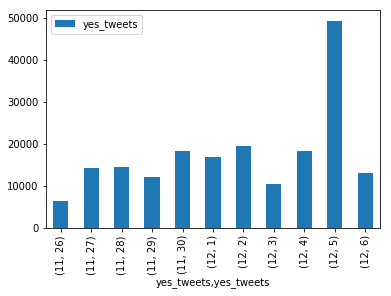

AxesSubplot(0.125,0.125;0.775x0.755)


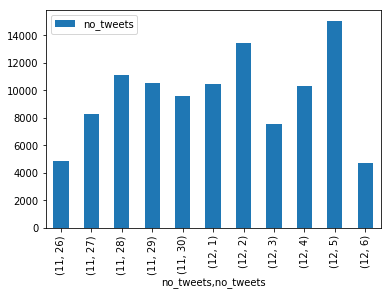

AxesSubplot(0.125,0.125;0.775x0.755)


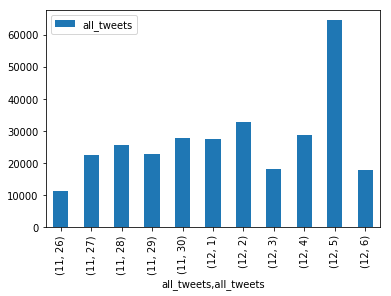

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import dates



#Distribution over time Tweets
data_y = pd.read_csv("yes_tt.csv")
data_y = data_y.iloc[:,:].values
data_n = pd.read_csv("no_tt.csv")
data_n = data_n.iloc[:,:].values
data = np.append(data_y,data_n)


'''

plt.hist(data)
plt.xlabel("Time")
plt.ylabel("Frequency") 
plt.title("Distribution over time")
#plt.show()

plt.hist(data_y)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Distribution over time Yes")
#plt.show()

plt.hist(data_n)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Distribution over time No")
#plt.show()

'''

from datetime import datetime
ts = int("1284101485")

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
#print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))



#convert strings into datetime objects
conv_time_y = [datetime.utcfromtimestamp(int(int(i)/1000)).strftime('%Y-%m-%d %H:%M:%S') for i in data_y]

#print(conv_time)



df = pd.DataFrame(conv_time_y, columns=['yes_tweets'])

df["yes_tweets"] = pd.to_datetime(df["yes_tweets"])

#print(df)

print(df.groupby(by=[df["yes_tweets"].dt.month, df["yes_tweets"].dt.day]).count().plot(kind="bar"))
plt.show()


conv_time_n = [datetime.utcfromtimestamp(int(int(i)/1000)).strftime('%Y-%m-%d %H:%M:%S') for i in data_n]

#print(conv_time)



df = pd.DataFrame(conv_time_n, columns=['no_tweets'])

df["no_tweets"] = pd.to_datetime(df["no_tweets"])

#print(df)

print(df.groupby(by=[df["no_tweets"].dt.month, df["no_tweets"].dt.day]).count().plot(kind="bar"))
plt.show()




conv_time_all = [datetime.utcfromtimestamp(int(int(i)/1000)).strftime('%Y-%m-%d %H:%M:%S') for i in data]

#print(conv_time)



df = pd.DataFrame(conv_time_all, columns=['all_tweets'])

df["all_tweets"] = pd.to_datetime(df["all_tweets"])

#print(df)

print(df.groupby(by=[df["all_tweets"].dt.month, df["all_tweets"].dt.day]).count().plot(kind="bar"))
plt.show()

#df.groupby(by=[b.index.month, b.index.year])



DatetimeIndex(['2014-07-11 00:00:00', '2014-07-11 00:05:00',
               '2014-07-11 00:10:00', '2014-07-11 00:15:00',
               '2014-07-11 00:20:00', '2014-07-11 00:25:00',
               '2014-07-11 00:30:00', '2014-07-11 00:35:00',
               '2014-07-11 00:40:00', '2014-07-11 00:45:00',
               ...
               '2014-07-14 10:30:00', '2014-07-14 10:35:00',
               '2014-07-14 10:40:00', '2014-07-14 10:45:00',
               '2014-07-14 10:50:00', '2014-07-14 10:55:00',
               '2014-07-14 11:00:00', '2014-07-14 11:05:00',
               '2014-07-14 11:10:00', '2014-07-14 11:15:00'],
              dtype='datetime64[ns]', length=1000, freq='5T')


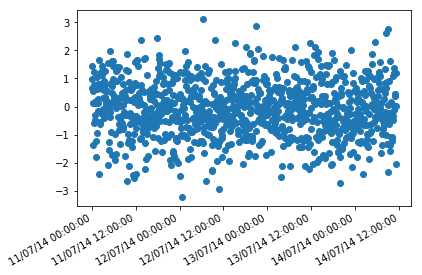

In [13]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import dates

# Generate some random data and plot it

time = pd.date_range('07/11/2014', periods=1000, freq='5min')
ts = pd.Series(pd.np.random.randn(len(time)), index=time)

print(time)

fig, ax = plt.subplots()

ax.plot_date(ts.index.to_pydatetime(), ts.data)

# Create your formatter object and change the xaxis formatting.

date_fmt = '%d/%m/%y %H:%M:%S'

formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)

plt.gcf().autofmt_xdate()

plt.show()

Word Cloud for YES words


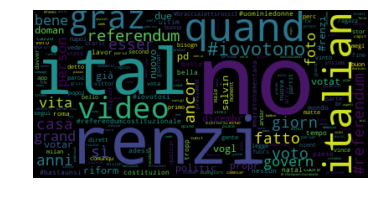

Word Cloud for NO words


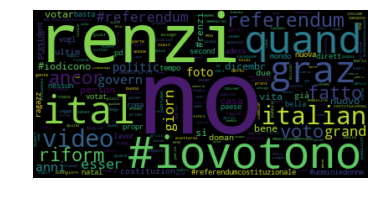

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import json
from pprint import pprint

with open('yesWords.json') as f:
    yes_words = json.load(f)

d = {}
for a in yes_words:
    d[a] = yes_words[a]


print("Word Cloud for YES words")

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


print("Word Cloud for NO words")

with open('noWords.json') as f:
    no_words = json.load(f)

d = {}
for a in no_words:
    d[a] = no_words[a]



wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()